# Handling Categorical Missing Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv('dataset\\train_housing_data.csv' ,usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

Text(0, 0.5, 'Number of houses')

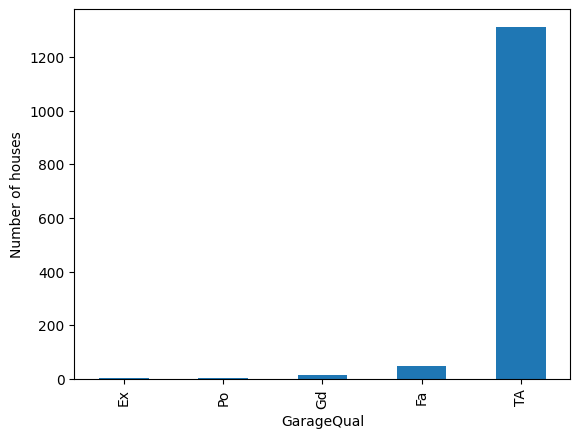

In [8]:
df['GarageQual'].value_counts().sort_values(ascending=True).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

## USING Most Frequent 

In [9]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

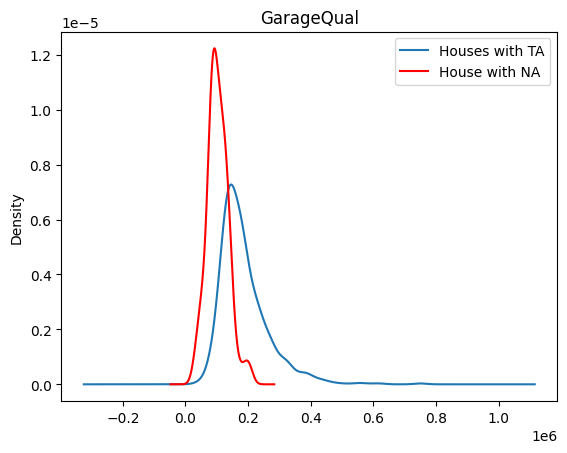

In [11]:
fig =plt.figure()
ax =fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind ='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels =ax.get_legend_handles_labels()
labels =['Houses with TA', 'House with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [12]:
temp =df[df['GarageQual']=='TA']['SalePrice']

In [13]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

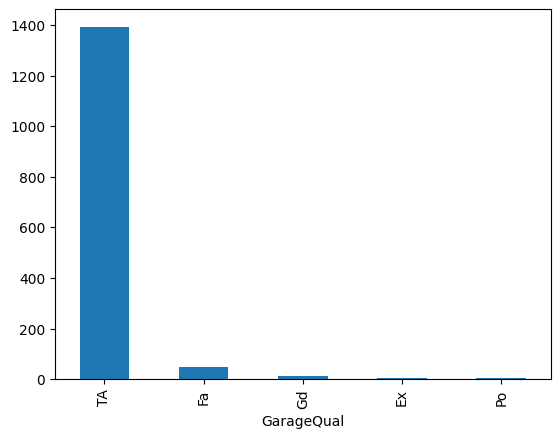

In [14]:
df['GarageQual'].value_counts().plot(kind ='bar')

Text(0.5, 1.0, 'GarageQual')

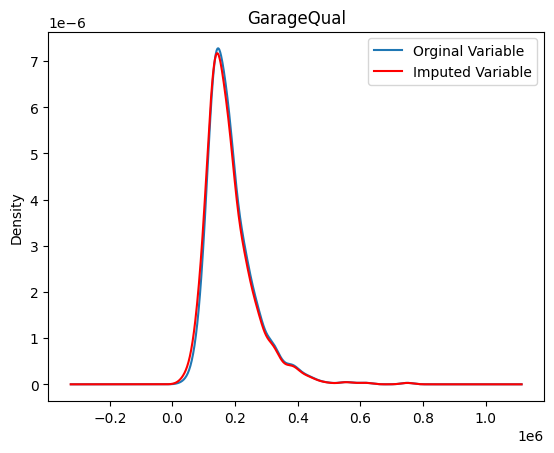

In [15]:
fig =plt.figure()
ax= fig.add_subplot(111)

temp .plot(kind='kde',ax=ax)

# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels =ax.get_legend_handles_labels()
labels=['Orginal Variable','Imputed Variable']

ax.legend(lines,labels,loc='best')

plt.title('GarageQual')


<Axes: xlabel='FireplaceQu'>

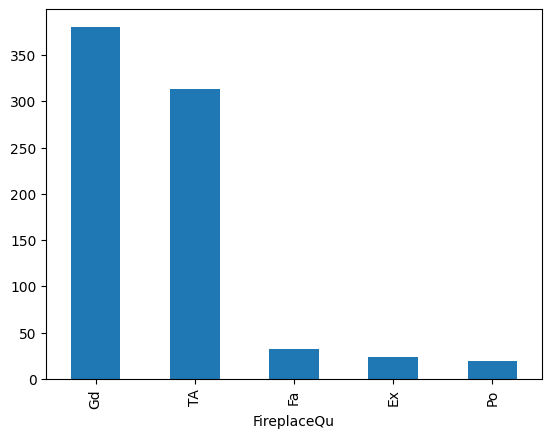

In [16]:
# perfoming on the column which have 50% missing value
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

In [17]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

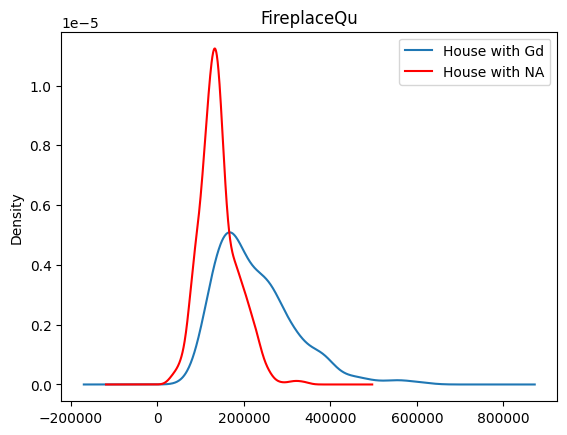

In [18]:
fig =plt.figure()
ax= fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels =ax.get_legend_handles_labels()
labels =['House with Gd','House with NA']

ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')



In [19]:
temp1 =df[df['FireplaceQu']=='Gd']['SalePrice']

In [20]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

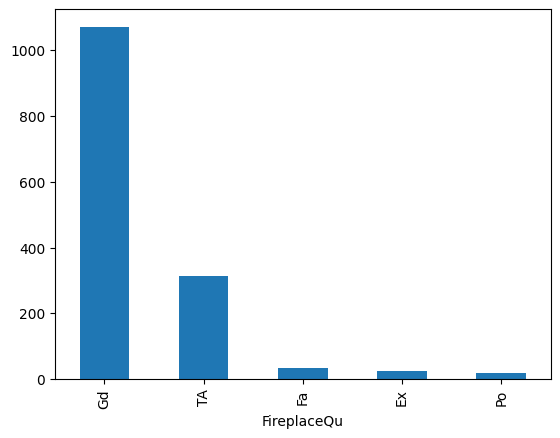

In [21]:
df['FireplaceQu'].value_counts().plot.bar()

Text(0.5, 1.0, 'FirePlaceQu')

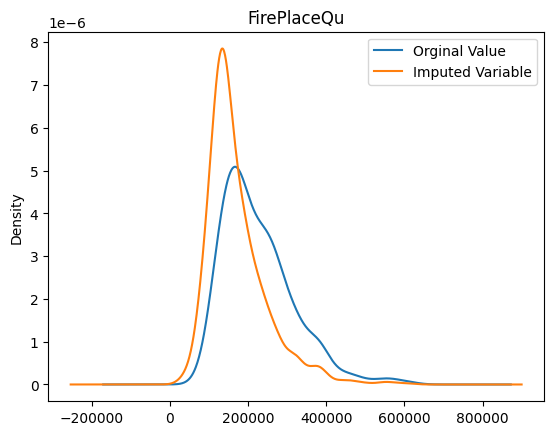

In [22]:
fig =plt.figure()
ax=fig.add_subplot(111)

temp1.plot(kind='kde',ax=ax)

# distribution of variable after imputation

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

lines,labels =ax.get_legend_handles_labels()
labels =['Orginal Value','Imputed Variable']

ax.legend(lines,labels,loc='best')

plt.title('FirePlaceQu')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [24]:
X_train ,X_test,Y_train,Y_test =train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2,random_state=4)

In [25]:
imputer =SimpleImputer(strategy='most_frequent')


In [26]:
X_train =imputer.fit_transform(X_train)
X_test =imputer.fit_transform(X_test)

In [27]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# Using Missing category Imputation

In [30]:
df =pd.read_csv('dataset\\train_housing_data.csv' ,usecols=['GarageQual','FireplaceQu','SalePrice'])

In [31]:
df['GarageQual'].fillna('Missing',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_11976\3265589431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing',inplace=True)


<Axes: xlabel='GarageQual'>

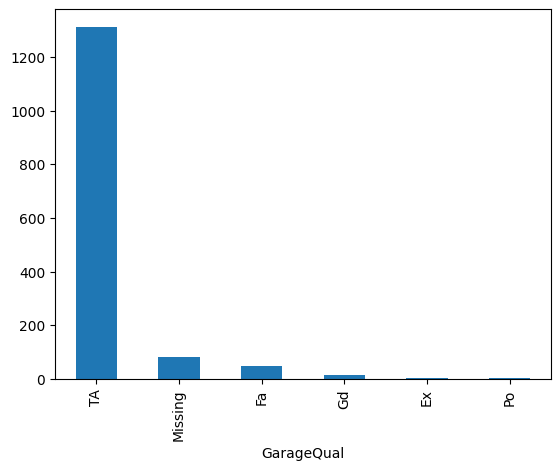

In [32]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

In [33]:
df['FireplaceQu'].fillna('Missing',inplace=True)

<Axes: xlabel='FireplaceQu'>

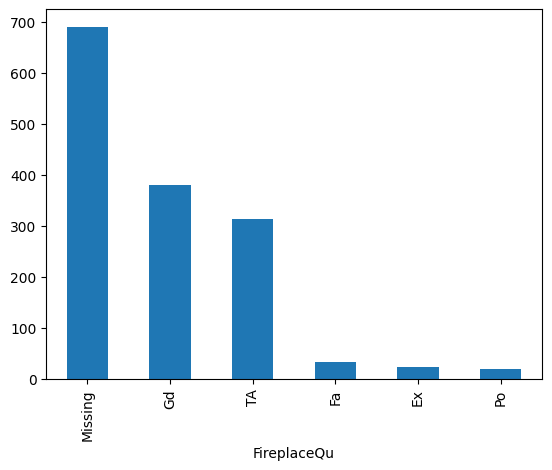

In [34]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

with sklearn imputer 

In [35]:
X_train ,X_test,Y_train,Y_test =train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2,random_state=4)

In [39]:
imputer1 =SimpleImputer(strategy='constant',fill_value='Missing')

In [40]:
X_train =imputer1.fit_transform(X_train)
X_test =imputer1.fit_transform(X_test)

In [41]:
imputer1.statistics_

array(['Missing', 'Missing'], dtype=object)